### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Read the data

Load the csv file and set the first column as index

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


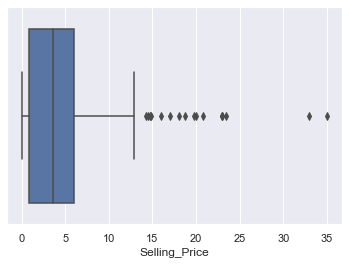

In [113]:
sns.boxplot(df['Selling_Price'])
plt.show()

In [4]:
q = df['Selling_Price'].quantile(.99)
data = df[df['Selling_Price']<q]

In [5]:
q1 = data['Kms_Driven'].quantile(.99)
data1 = data[data['Kms_Driven']<q1]

In [6]:
q2 = data1['Present_Price'].quantile(.99)
data2 = data1[data1['Present_Price']<q2]

In [7]:
data2.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,287,287.000000,287.000000,287.000000,287.000000,287,287,287,287.000000
unique,97,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,237,184,258,NaN
mean,NaN,2013.675958,4.022439,6.501707,33230.752613,NaN,NaN,NaN,0.045296
std,NaN,2.860916,3.617112,5.458544,23410.721478,NaN,NaN,NaN,0.253722
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.790000,1.185000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.450000,5.900000,31000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,5.825000,9.400000,46140.000000,NaN,NaN,NaN,0.000000


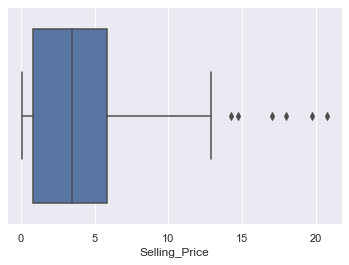

In [112]:
sns.boxplot(data2['Selling_Price'])
plt.show()

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

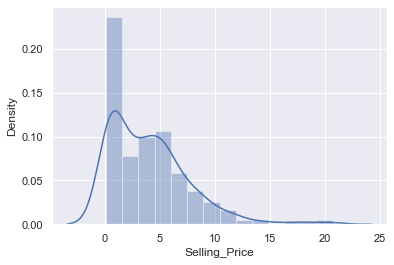

In [8]:
sns.distplot(data2['Selling_Price'])

## Checking the OLS assumptions

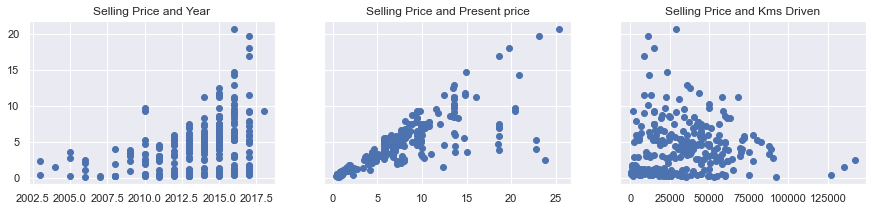

In [9]:
f, (a, b, c) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
a.scatter(data2['Year'], data2['Selling_Price'])
a.set_title('Selling Price and Year')
b.scatter(data2['Present_Price'],data2['Selling_Price'])
b.set_title('Selling Price and Present price')
c.scatter(data2['Kms_Driven'] ,data2['Selling_Price'])
c.set_title('Selling Price and Kms Driven')
plt.show()

In [10]:
log_Selling_Price = np.log(data2['Selling_Price'])
data2['log_Selling_Price'] = log_Selling_Price
data2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,log_Selling_Price
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.208960
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.558145
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1.981001
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.047319
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.526056


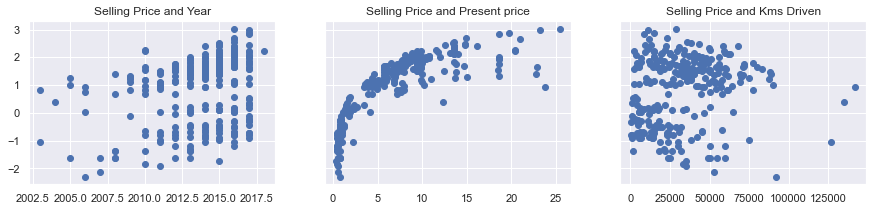

In [11]:
f, (a, b, c) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
a.scatter(data2['Year'], data2['log_Selling_Price'])
a.set_title('Selling Price and Year')
b.scatter(data2['Present_Price'],data2['log_Selling_Price'])
b.set_title('Selling Price and Present price')
c.scatter(data2['Kms_Driven'] ,data2['log_Selling_Price'])
c.set_title('Selling Price and Kms Driven')
plt.show()

In [12]:
df1 = data2.drop(['Selling_Price'], axis=1)

## Multicollinearity

In [13]:
df1.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'log_Selling_Price'],
      dtype='object')

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df1[['Year', 'Present_Price', 'Kms_Driven']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [15]:
vif
# No multicollinearity

,VIF,features
0,3.510508,Year
1,2.836597,Present_Price
2,3.528123,Kms_Driven


In [16]:
df1.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,log_Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,1.208960
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,1.558145
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,1.981001
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,1.047319
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,1.526056


## Coverting Car Names into their Brand

In [20]:
maruti = ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 'ciaz',
       's cross', 'ciaz', 'ciaz', 'alto 800', 'ciaz', 'ciaz', 'ertiga',
       'dzire', 'ertiga', 'ertiga', 'ertiga', 'wagon r', 'sx4',
       'alto k10', 'ignis', 'sx4', 'alto k10', 'wagon r', 'swift',
       'swift', 'swift', 'alto k10', 'ciaz', 'ritz', 'ritz', 'swift',
       'ertiga', 'dzire', 'sx4', 'dzire', '800', 'alto k10', 'sx4',
       'baleno', 'alto k10', 'sx4', 'dzire', 'omni', 'ciaz', 'ritz',
       'wagon r', 'ertiga', 'ciaz']

In [19]:
toyota = ['innova', 'innova', 'corolla altis', 'etios cross',
       'corolla altis', 'etios g', 'corolla altis', 'etios cross',
       'etios liva', 'innova', 'fortuner', 'corolla altis',
       'corolla altis', 'etios liva', 'corolla altis', 'corolla altis',
       'etios liva', 'etios cross', 'etios g', 'corolla altis', 'corolla',
       'corolla altis', 'corolla altis', 'etios gd', 'innova', 'camry',
       'corolla altis', 'etios liva', 'etios g', 'corolla altis',
       'innova', 'innova', 'corolla altis', 'corolla altis', 'innova',
       'corolla altis', 'corolla altis', 'fortuner']

In [21]:
hyundai = ['i20', 'grand i10', 'i10', 'eon', 'grand i10', 'xcent',
       'grand i10', 'i20', 'grand i10', 'i10', 'elantra', 'creta', 'i20',
       'grand i10', 'verna', 'eon', 'eon', 'verna', 'verna', 'eon', 'i20',
       'i20', 'verna', 'verna', 'i10', 'grand i10', 'i10', 'verna', 'i20',
       'verna', 'verna', 'elantra', 'grand i10', 'grand i10', 'verna',
       'eon', 'creta', 'verna', 'eon', 'verna', 'xcent', 'xcent', 'i20',
       'verna', 'verna', 'i20', 'verna', 'i10', 'i20', 'creta']

In [22]:
honda = ['city', 'brio', 'city', 'city', 'brio', 'city', 'city', 'city',
       'amaze', 'city', 'brio', 'amaze', 'jazz', 'amaze', 'jazz', 'amaze',
       'city', 'brio', 'city', 'city', 'city', 'city', 'jazz', 'brio',
       'city', 'city', 'city', 'jazz', 'city', 'brio', 'city', 'city',
       'city', 'brio', 'jazz', 'jazz', 'amaze', 'city', 'city', 'amaze',
       'brio', 'jazz', 'city', 'amaze', 'city', 'city', 'brio', 'city',
       'city', 'brio']

In [47]:
def branding(x):
    if x in maruti:
         return 'Maruti Suzuki'
    elif x in toyota:
        return 'Toyota'
    elif x in hyundai:
        return 'Hyundai'
    elif x in honda:
        return 'Honda'
    else:
        return 'Bikes'

In [130]:
df1['Brand'] = df1['Car_Name'].apply(branding)
df1.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,log_Selling_Price,Brand
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,1.208960,Maruti Suzuki
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,1.558145,Maruti Suzuki
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,1.981001,Maruti Suzuki
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,1.047319,Maruti Suzuki
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,1.526056,Maruti Suzuki


In [53]:
car = df1.drop(['Car_Name'], axis=1)

In [136]:
car['Brand'].unique()

array(['Maruti Suzuki', 'Toyota', 'Bikes', 'Hyundai', 'Honda'],
      dtype=object)

## Dummy Variables

In [131]:
cars = pd.get_dummies(car, drop_first=True)

In [132]:
cars.describe(include= 'all')

,Year,Present_Price,Kms_Driven,Owner,log_Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Toyota
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2013.675958,6.501707,33230.752613,0.045296,0.844328,0.167247,0.825784,0.358885,0.898955,0.174216,0.174216,0.174216,0.132404
std,2.860916,5.458544,23410.721478,0.253722,1.212448,0.373848,0.379958,0.480511,0.301915,0.379958,0.379958,0.379958,0.339522
min,2003.000000,0.320000,500.000000,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.185000,15000.000000,0.000000,-0.235802,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.900000,31000.000000,0.000000,1.238374,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,9.400000,46140.000000,0.000000,1.762150,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,25.390000,142000.000000,3.000000,3.032546,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
cars.head()

,Year,Present_Price,Kms_Driven,Owner,log_Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Toyota
0,2014,5.59,27000,0,1.208960,0,1,0,1,0,0,1,0
1,2013,9.54,43000,0,1.558145,1,0,0,1,0,0,1,0
2,2017,9.85,6900,0,1.981001,0,1,0,1,0,0,1,0
3,2011,4.15,5200,0,1.047319,0,1,0,1,0,0,1,0
4,2014,6.87,42450,0,1.526056,1,0,0,1,0,0,1,0


## Rearrange the data

In [57]:
cars.columns.values

array(['Year', 'Present_Price', 'Kms_Driven', 'Owner',
       'log_Selling_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Maruti Suzuki', 'Brand_Toyota'],
      dtype=object)

In [40]:
cols = ['log_Selling_Price', 'Year', 'Present_Price', 'Kms_Driven', 'Owner',
        'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Maruti Suzuki', 'Brand_Toyota']

In [117]:
cars_df = cars[cols]
cars_df.head()

,log_Selling_Price,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Toyota
0,1.208960,2014,5.59,27000,0,0,1,0,1,0,0,1,0
1,1.558145,2013,9.54,43000,0,1,0,0,1,0,0,1,0
2,1.981001,2017,9.85,6900,0,0,1,0,1,0,0,1,0
3,1.047319,2011,4.15,5200,0,0,1,0,1,0,0,1,0
4,1.526056,2014,6.87,42450,0,1,0,0,1,0,0,1,0


## Declare the inputs and target

In [42]:
Y = cars_df['log_Selling_Price']
X = cars_df.drop(['log_Selling_Price'], axis=1)

## Scale The Data

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [59]:
X1 = scaler.transform(X)

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.20, random_state=365)

## Create the Regression

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(x_train, y_train)

LinearRegression()

In [63]:
y_hat = reg.predict(x_train)

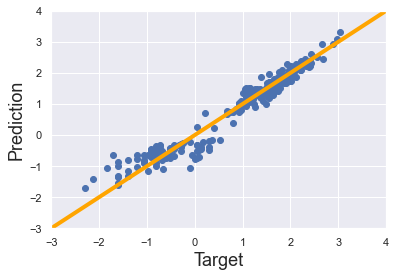

In [85]:
plt.scatter(y_train, y_hat)
plt.plot([-3,4], [-3,4], lw=4, c='orange')
plt.xlabel('Target', size=18)
plt.ylabel('Prediction', size=18)
plt.xlim(-3,4)
plt.ylim(-3,4)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

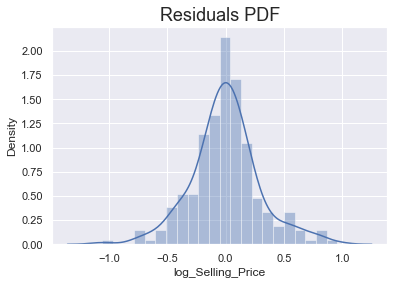

In [87]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [89]:
reg.score(x_train, y_train)
# Model explaining the 94% of the variability of the data

0.9426038476618755

## Testing

In [90]:
y_hat_test = reg.predict(x_test)

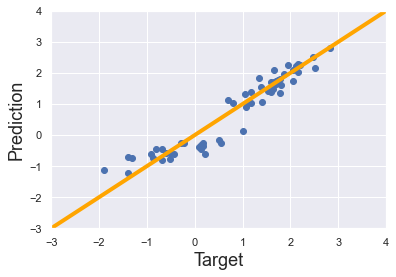

In [91]:
plt.scatter(y_test, y_hat_test)
plt.plot([-3,4], [-3,4], lw=4, c='orange')
plt.xlabel('Target', size=18)
plt.ylabel('Prediction', size=18)
plt.xlim(-3,4)
plt.ylim(-3,4)
plt.show()

In [92]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,0.698427
1,0.481751
2,0.639757
3,7.253170
4,2.762197


In [118]:
y_test = y_test.reset_index(drop=True)

In [120]:
df_pf['Target'] = np.exp(y_test)

In [100]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [108]:
df_pf['Difference%'] = np.absolute( df_pf['Residual']/df_pf['Target']*100)

In [109]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,58.000000,58.000000,58.000000,58.000000
mean,3.922584,3.968966,0.046382,26.637644
std,3.672632,3.599076,1.064242,24.076566
min,0.295720,0.150000,-2.844962,0.819928
25%,0.656116,0.875000,-0.412122,8.588155
50%,2.982860,3.125000,-0.016871,18.265903
75%,5.839024,5.875000,0.488413,37.453192
max,16.692672,17.000000,3.891704,117.586330


In [104]:
df_pf.sort_values(by= ['Difference%'])

,Prediction,Target,Residual,Difference%
53,0.554510,0.55,-0.004510,0.819928
16,16.692672,17.00,0.307328,1.807814
19,5.659177,5.50,-0.159177,2.894119
37,6.133173,5.95,-0.183173,3.078535
46,0.775076,0.80,0.024924,3.115516
29,12.165135,11.75,-0.415135,3.533066
33,0.779233,0.75,-0.029233,3.897708
35,5.898973,5.65,-0.248973,4.406599
25,5.492369,5.25,-0.242369,4.616557
24,8.153081,7.75,-0.403081,5.201049
